# Working with Time Series

# A. Dates and Times in Python

### A.1. Native Python Dates and Times: `datetime` and `dateutil`

In [1]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Sunday'

### A.2. Typed Arrays of Times: NumPy's `datetime64`

* NumPy’s `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented compactly and operated on in an efficient manner.

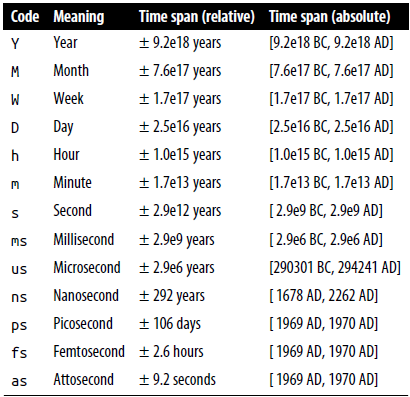

In [4]:
import numpy as np
date = np.array('2021-07-05', dtype=np.datetime64)
date

array('2021-07-05', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [7]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [8]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

### A.3. Dates and Times in Pandas

* `Timestamp` object:
    * combines the ease of use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.

* `DatetimeIndex` :
    * used to index data in a Series or DataFrame.
    * from a group of Timestamp objects.

In [9]:
import pandas as pd

In [10]:
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Sunday'

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

# B. Pandas Time Series: Indexing by Time

In [13]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04', '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [14]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [15]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

# C. Pandas Time Series Data Structures

* Timestamps:
    * `Timestamp` type:
        * This is essentially a replacement for Python’s native `datetime`, but it’s based on the more efficient `numpy.datetime64` data type.
    * `DatetimeIndex` type:
        * Associated `Index` structure

* Time Periods:
    * `Period` type:
        * Encodes a fixed-frequency interval based on `numpy.datetime64`.
    * `PeriodIndex` type:
        * Associated `Index` structure

* Time Deltas or Durations:
    * `Timedelta` type:
        * More efficient replacement for Python's native `datetime.timedelta` and is based on `numpy.timedelta64`
    * `TimedeltaIndex` type:
        * Associated `Index` structure

In [16]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021', '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [17]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [18]:
dates -dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# D. Regular Sequences: `pd.date_range`

* `pd.date_range` for timestamps
* `pd.period_range` for periods
* `pd.timedelta_range` for time deltas

In [19]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [23]:
pd.timedelta_range(0, periods=6, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

# E. Frequencies and Offsets

* Listing of Pandas frequency codes:
    * 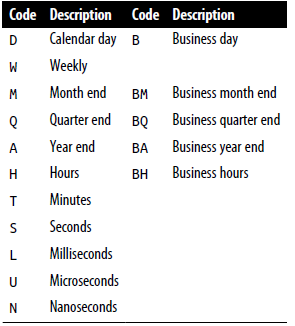

* Listing of start-indexed frequency codes
    * 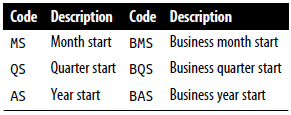
    * Addionally, you change the month used to mark any quarterly or annual code by adding a 3-letter month code as suffix:
        * `Q-JAN`, `BQ-FEB`, `QS-MAR`, etc.

    * In the same way, the split point of the weekly frequency can be modified by adding a 3-letter weekday code: `W-SUN`, `W-MON`, `W-TUE`, etc.

In [24]:
# Frequency of 2 hours and 30 minutes
pd.timedelta_range(0, periods=6, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [25]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

# F. Resampling, Shifting, and Windowing

In [31]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

In [33]:
sp500 = yf.download('^GSPC', start="2018-01-01", end="2022-12-31")
type(sp500)

[*********************100%%**********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [34]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


In [37]:
sp500_close = sp500['Close']

C:\Users\JCA\AppData\Local\Temp\ipykernel_21308\448111764.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


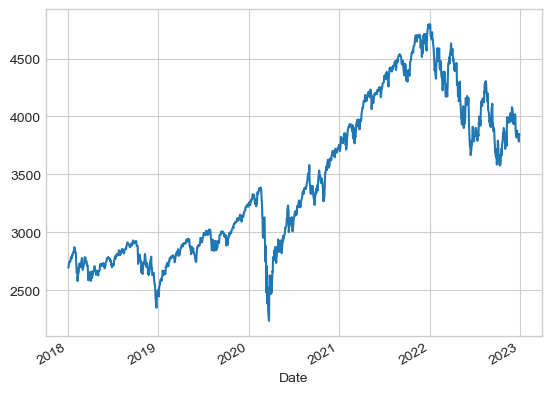

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
sp500_close.plot();

### F.1. Resampling and Converting Frequencies:
* `resample` method or `asfreq` method:
    * resampling at a higher or lower frequency from a time series data.
    * Primary difference b/n the 2 methods is that `resample` is fundamentally a data aggregation, while `asfreq` is fundametnally a data selection.

* In the example below:
    * `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

* For upsample, resampling and asfreq are largely equivalent, though resample has many more options available.

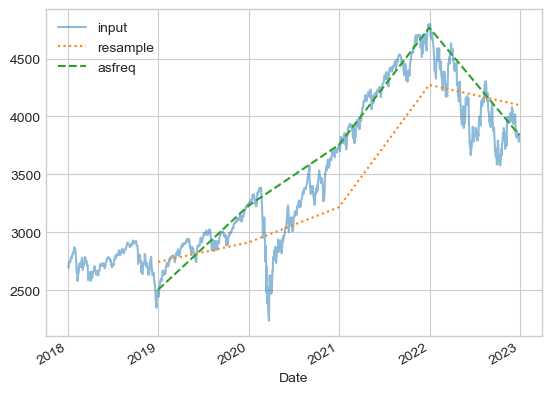

In [39]:
sp500_close.plot(alpha=0.5, style='-')
sp500_close.resample('BA').mean().plot(style=':')
sp500_close.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

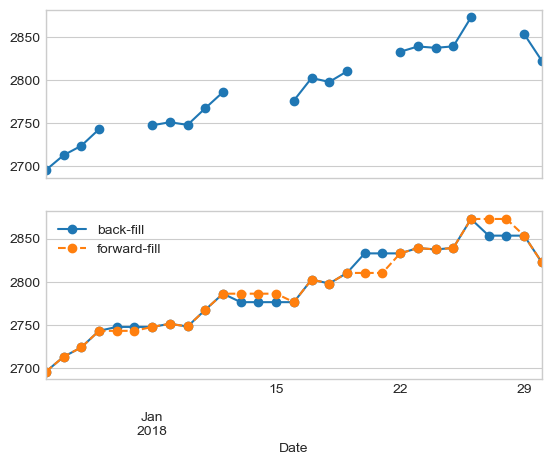

In [40]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500_close.iloc[:20]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### F.2. Time Shifts

* `shift` method is used to shift data by a given number of entries.

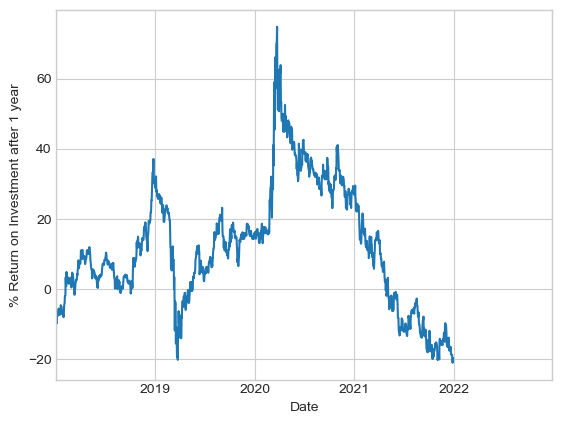

In [41]:
sp500 = sp500_close.asfreq('D', method='pad')

ROI = 100* (sp500.shift(-365)-sp500)/sp500
ROI.plot()
plt.ylabel('% Return on Investment after 1 year');

### F.3. Rolling Windows

* Calculating rolling statistics is a third type of time series–specific operation implemented by Pandas:
    * This can be accomplished via the rolling attribute of Series and
DataFrame objects, which returns a view similar to what we saw with the groupby
operation.
    * This rolling view makes available a number of aggregation
operations by default.

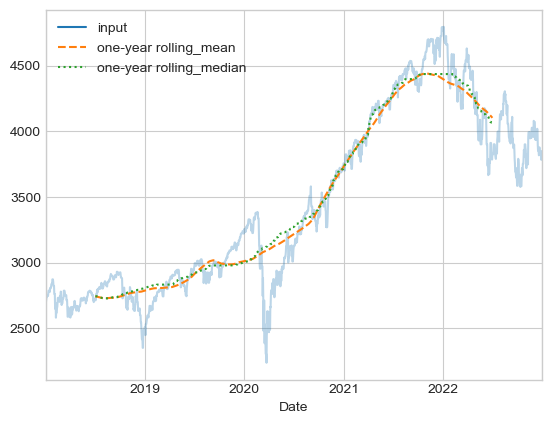

In [42]:
rolling = sp500.rolling(365, center=True)

data = pd.DataFrame({'input': sp500,
                        'one-year rolling_mean': rolling.mean(),
                        'one-year rolling_median': rolling.median()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# G. Example: Visualizing Bicycle Counts

In [43]:
url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main/FremontBridge.csv'
data = pd.read_csv(url, index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [44]:
data.columns = ['Total', 'East', 'West']
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


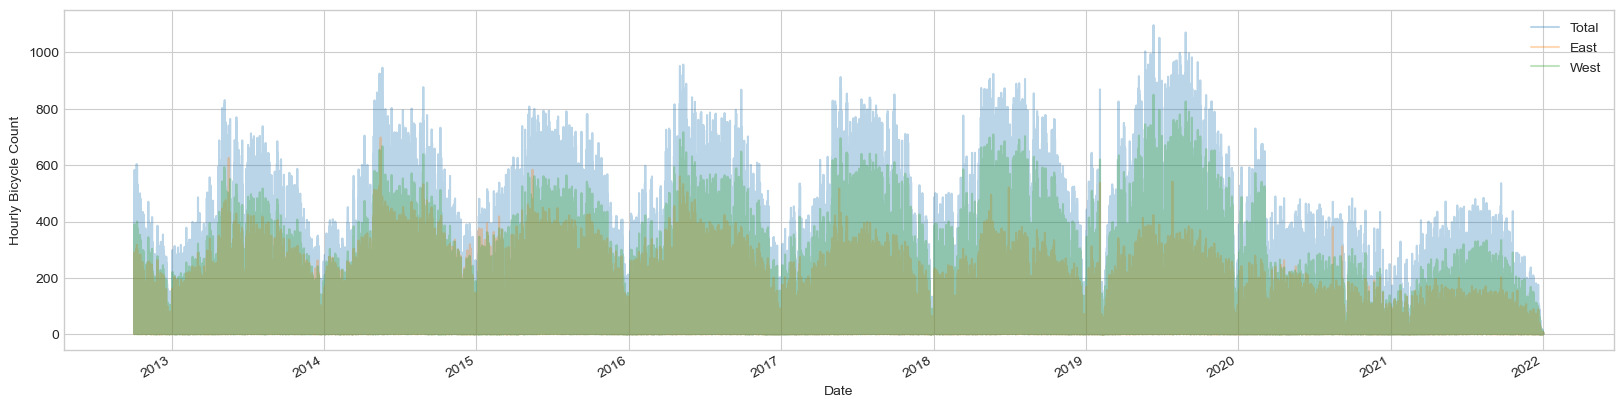

In [56]:
data.plot( alpha=0.3, figsize=(20,5))
plt.ylabel('Hourly Bicycle Count');

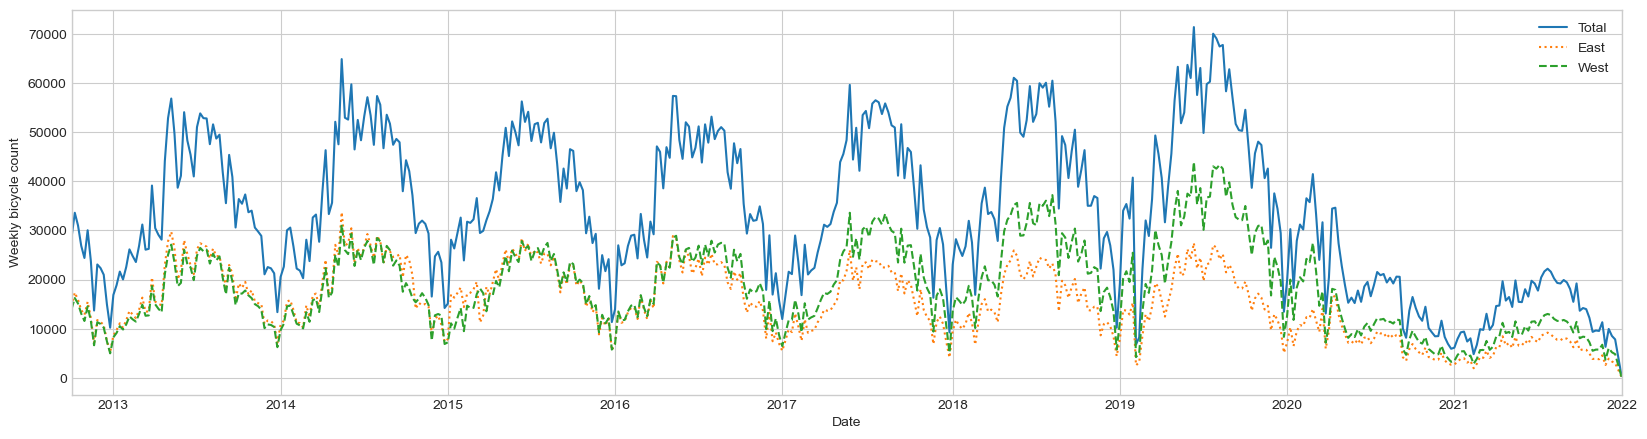

In [55]:
# REsample by week
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'], figsize=(20,5))
plt.ylabel('Weekly bicycle count');

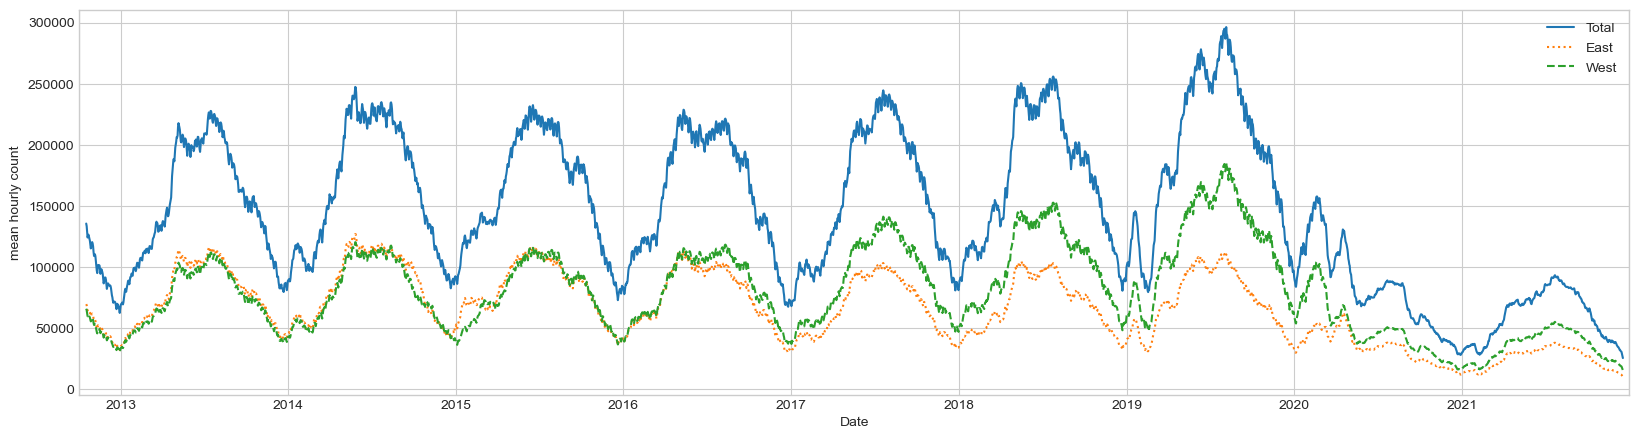

In [59]:
# Rolling Mean
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'],  figsize=(20,5))
plt.ylabel('mean hourly count');

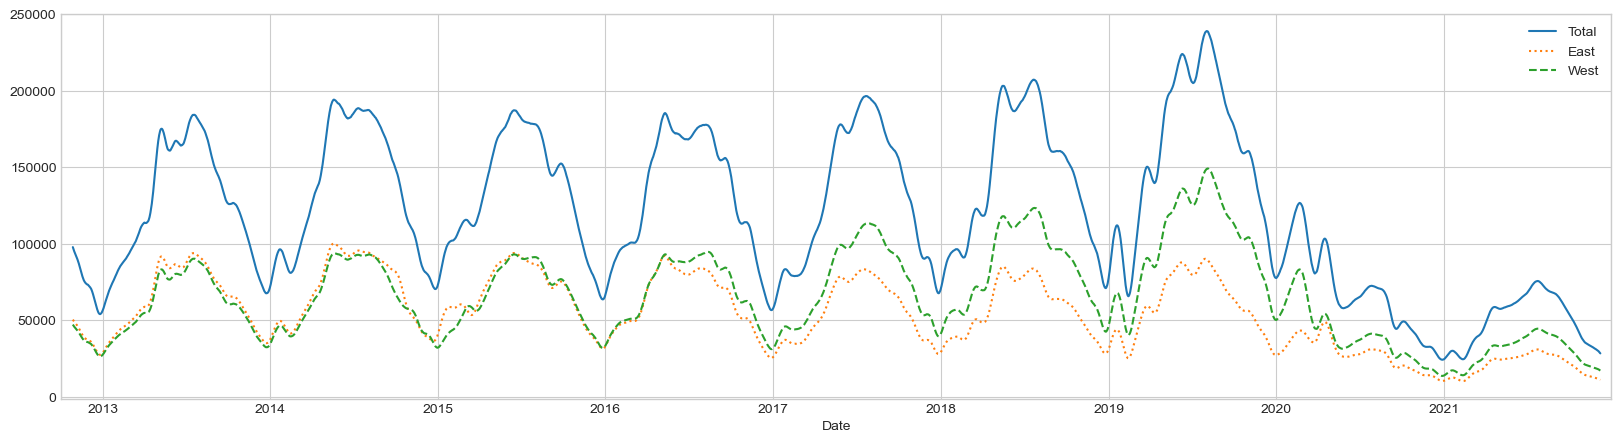

In [60]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'],  figsize=(20,5));

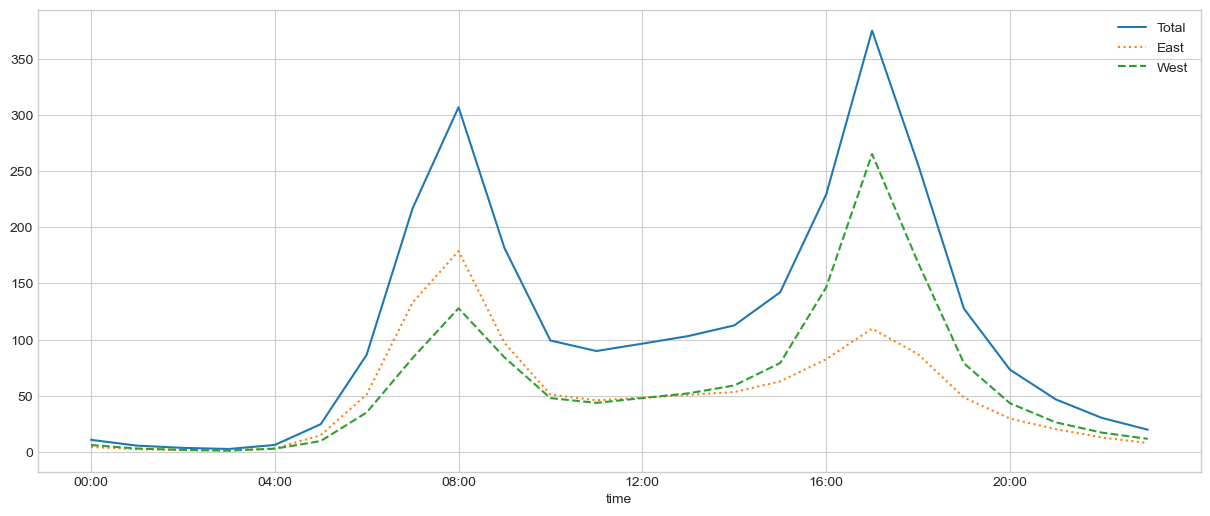

In [62]:
# Average traffic as a function of thetime of day.

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'], figsize=(15,6));

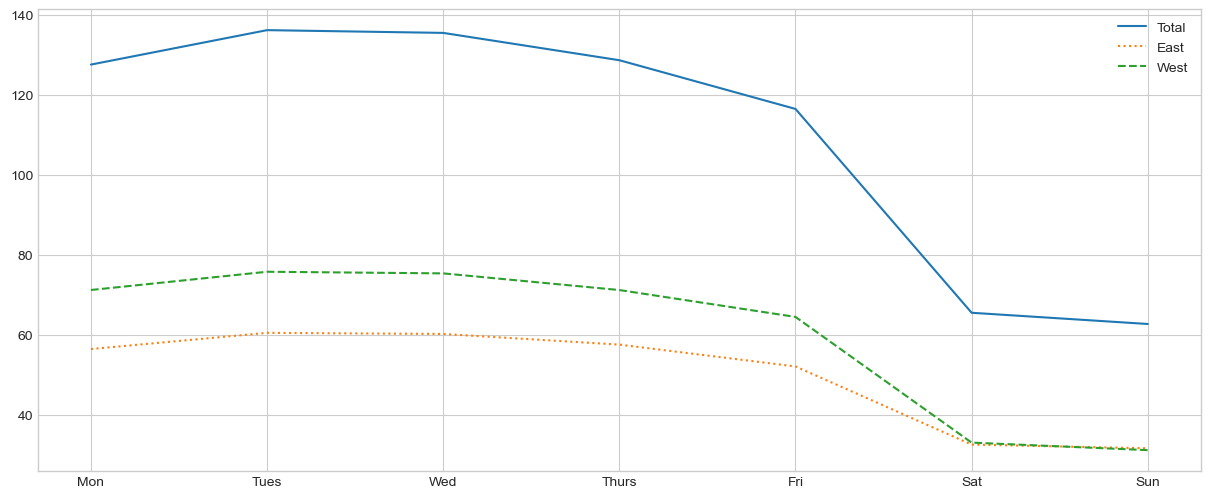

In [66]:
# How things change based on the day of the week

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'], figsize=(15,6));

In [67]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

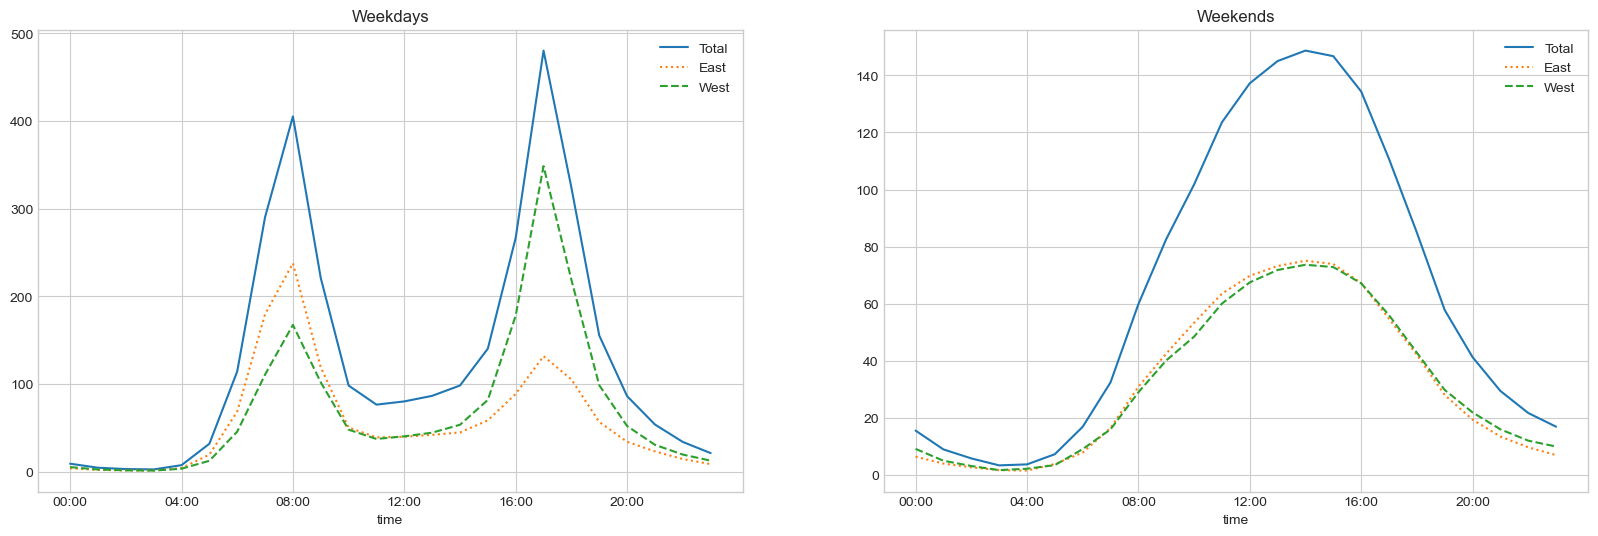

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=['-', ':', '--']);
